<a href="https://colab.research.google.com/github/stephanie0620/113_1/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 證券交易所

In [ ]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

import matplotlib.pyplot as plt

In [ ]:
# 股票代號
stock_id = '2454'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = 20241101

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20240924


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"3,294,144","4,033,872,708","1,240.00","1,250.00","1,215.00","1,225.00",-15.00,"5,675"
1,113/09/03,"3,534,979","4,292,070,390","1,225.00","1,225.00","1,200.00","1,220.00",-5.00,"6,693"
2,113/09/04,"10,457,652","11,943,320,285","1,135.00","1,170.00","1,130.00","1,135.00",-85.00,"31,959"
3,113/09/05,"9,432,513","10,509,325,015","1,120.00","1,130.00","1,105.00","1,110.00",-25.00,"21,502"
4,113/09/06,"5,340,953","6,061,653,645","1,110.00","1,150.00","1,105.00","1,145.00",+35.00,"7,743"
5,113/09/09,"7,455,495","8,209,712,700","1,100.00","1,115.00","1,090.00","1,105.00",-40.00,"17,956"
6,113/09/10,"5,893,397","6,599,039,331","1,115.00","1,130.00","1,100.00","1,130.00",+25.00,"8,084"
7,113/09/11,"4,096,499","4,588,000,025","1,125.00","1,135.00","1,110.00","1,110.00",-20.00,"6,026"
8,113/09/12,"4,719,178","5,409,189,304","1,150.00","1,155.00","1,135.00","1,155.00",+45.00,"6,893"
9,113/09/13,"3,546,828","4,032,559,340","1,160.00","1,165.00","1,125.00","1,125.00",-30.00,"6,532"


In [ ]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

In [ ]:
# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2024/09/10'
end_date = '2024/09/15'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

filtered_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
6,2024-09-10,"5,893,397","6,599,039,331","1,115.00","1,130.00","1,100.00","1,130.00",+25.00,"8,084"
7,2024-09-11,"4,096,499","4,588,000,025","1,125.00","1,135.00","1,110.00","1,110.00",-20.00,"6,026"
8,2024-09-12,"4,719,178","5,409,189,304","1,150.00","1,155.00","1,135.00","1,155.00",+45.00,"6,893"
9,2024-09-13,"3,546,828","4,032,559,340","1,160.00","1,165.00","1,125.00","1,125.00",-30.00,"6,532"


In [ ]:
def convert_minguo_to_ad(date_str):
    '''
    將民國日期格式轉換為西元日期格式，並以斜線分隔。

    參數：
    - date_str (str): 民國格式的日期 (如 '113年07月01日')

    返回：
    - str: 轉換後的西元格式日期 (如 '2024/07/01')
    '''
    year, month, day = date_str.replace('年', '/').replace('月', '/').replace('日', '').split('/')
    ad_year = int(year) + 1911  # 將民國年份轉換為西元年份
    return f"{ad_year}/{month}/{day}"

In [ ]:
# 設定查找時間
date_list = ['20240701', '20240801', '20240901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')

# 將 '日期' 欄位中的民國日期轉換為西元日期
all_df['日期'] = all_df['日期'].apply(convert_minguo_to_ad)

# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   2024/07/01   3.89   112  24.58  6.11  113/1
1   2024/07/02   3.90   112  24.49  6.08  113/1
2   2024/07/03   3.92   112  24.41  6.06  113/1
3   2024/07/04   4.00   112  23.88  5.93  113/1
4   2024/07/05   4.07   112  23.45  5.82  113/1
5   2024/07/08   3.87   112  24.67  6.13  113/1
6   2024/07/09   3.77   112  25.36  6.30  113/1
7   2024/07/10   3.83   112  24.93  6.19  113/1
8   2024/07/11   3.87   112  24.67  6.13  113/1
9   2024/07/12   4.04   112  23.62  5.87  113/1
10  2024/07/15   4.06   112  23.54  5.85  113/1
11  2024/07/16   4.09   112  23.36  5.80  113/1
12  2024/07/17   4.15   112  23.02  5.72  113/1
13  2024/07/18   4.30   112  22.23  5.52  113/1
14  2024/07/19   4.37   112  21.89  5.44  113/1
15  2024/07/22   4.49   112  21.28  5.29  113/1
16  2024/07/23   4.31   112  22.15  5.50  113/1
17  2024/07/26   4.42   112  21.63  5.37  113/1
18  2024/07/29   4.44   112  21.54  5.35  113/1
19  2024/07/30   4.38   112  21.80  5.42

In [ ]:
def show_basic_info(df):
    '''
    顯示 DataFrame 的基本資訊。
    '''
    print(df.info())
    print(df.describe())


In [ ]:
def plot_dividend_yield(df, title='Dividend Yield Trend'):
    '''
    繪製殖利率隨時間變化的趨勢圖。

    參數：
    - df (DataFrame): 包含 '日期' 和 '殖利率(%)' 欄位的資料
    - title (str): 圖表標題
    '''
    plt.figure(figsize=(14, 7))
    # 繪製殖利率隨時間變化的折線圖，並加上標記
    plt.plot(df['日期'], df['殖利率(%)'], marker='o')

    # 設定圖表標題
    plt.title(title)

    # 設定 X 軸標籤為英文
    plt.xlabel('Date')

    # 設定 Y 軸標籤為英文
    plt.ylabel('Dividend Yield (%)')

    # 顯示網格線
    plt.grid(True)

    # 設定 X 軸的標籤旋轉角度
    plt.xticks(rotation=45)

    # 顯示圖表
    plt.show()


In [ ]:
def plot_pe_ratio(df, title='P/E Ratio Trend'):
    '''
    繪製本益比隨時間變化的趨勢圖。

    參數：
    - df (DataFrame): 包含 '日期' 和 '本益比' 欄位的資料
    - title (str): 圖表標題
    '''
    plt.figure(figsize=(14, 7))
    # 繪製本益比隨時間變化的折線圖，並加上標記和顏色
    plt.plot(df['日期'], df['本益比'], marker='o', color='green')

    # 設定圖表標題為英文
    plt.title(title)

    # 設定 X 軸標籤為英文
    plt.xlabel('Date')

    # 設定 Y 軸標籤為英文
    plt.ylabel('P/E Ratio')

    # 顯示網格線
    plt.grid(True)

    # 設定 X 軸的標籤旋轉角度
    plt.xticks(rotation=45)

    # 顯示圖表
    plt.show()


In [ ]:
def plot_pbr(df, title='P/B Ratio Trend'):
    '''
    繪製股價淨值比隨時間變化的趨勢圖。

    參數：
    - df (DataFrame): 包含 '日期' 和 '股價淨值比' 欄位的資料
    - title (str): 圖表標題
    '''
    plt.figure(figsize=(14, 7))
    # 繪製股價淨值比隨時間變化的折線圖，並加上標記和紅色
    plt.plot(df['日期'], df['股價淨值比'], marker='o', color='red')

    # 設定圖表標題為英文
    plt.title(title)

    # 設定 X 軸標籤為英文
    plt.xlabel('Date')

    # 設定 Y 軸標籤為英文
    plt.ylabel('P/B Ratio')

    # 顯示網格線
    plt.grid(True)

    # 設定 X 軸的標籤旋轉角度
    plt.xticks(rotation=45)

    # 顯示圖表
    plt.show()


In [ ]:
def plot_financial_metrics(df, title='Financial Metrics Trend'):
    '''
    同時繪製殖利率、本益比、股價淨值比的趨勢圖。

    參數：
    - df (DataFrame): 包含 '日期'、'殖利率(%)'、'本益比'、'股價淨值比' 欄位的資料
    - title (str): 圖表標題
    '''
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 設定 X 軸標籤為英文
    ax1.set_xlabel('Date')

    # 設定左側 Y 軸的標籤和顏色為英文
    ax1.set_ylabel('Dividend Yield (%)', color='blue')
    ax1.plot(df['日期'], df['殖利率(%)'], marker='o', color='blue', label='Dividend Yield (%)')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 建立右側 Y 軸，設定本益比與股價淨值比的曲線
    ax2 = ax1.twinx()

    # 設定右側 Y 軸的標籤和顏色為英文
    ax2.set_ylabel('P/E Ratio / P/B Ratio', color='red')
    ax2.plot(df['日期'], df['本益比'], marker='o', color='green', label='P/E Ratio')
    ax2.plot(df['日期'], df['股價淨值比'], marker='o', color='red', label='P/B Ratio')
    ax2.tick_params(axis='y', labelcolor='red')

    # 自動調整布局以避免重疊
    fig.tight_layout()

    # 設定圖表標題
    plt.title(title)

    # 顯示圖例
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

    # 設定 X 軸的標籤旋轉角度
    plt.xticks(rotation=45)

    # 顯示網格線
    plt.grid(True)

    # 顯示圖表
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      58 non-null     object
 1   殖利率(%)  58 non-null     object
 2   股利年度    58 non-null     int64 
 3   本益比     58 non-null     object
 4   股價淨值比   58 non-null     object
 5   財報年/季   58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB
None
        股利年度
count   58.0
mean   112.0
std      0.0
min    112.0
25%    112.0
50%    112.0
75%    112.0
max    112.0


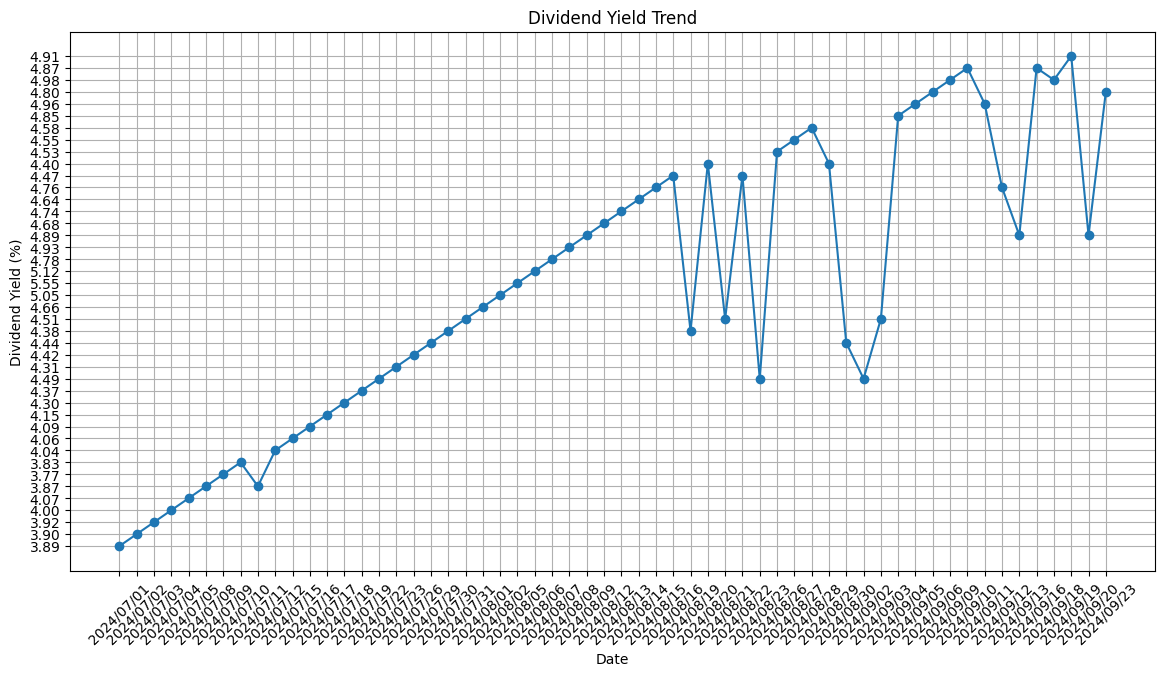

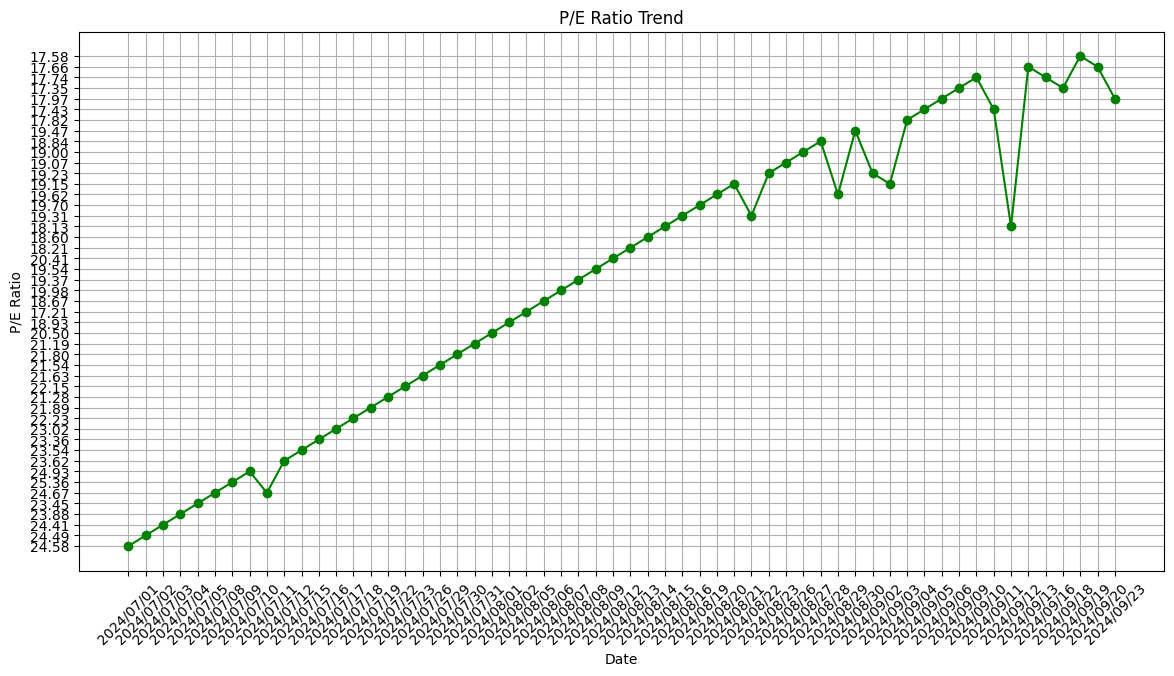

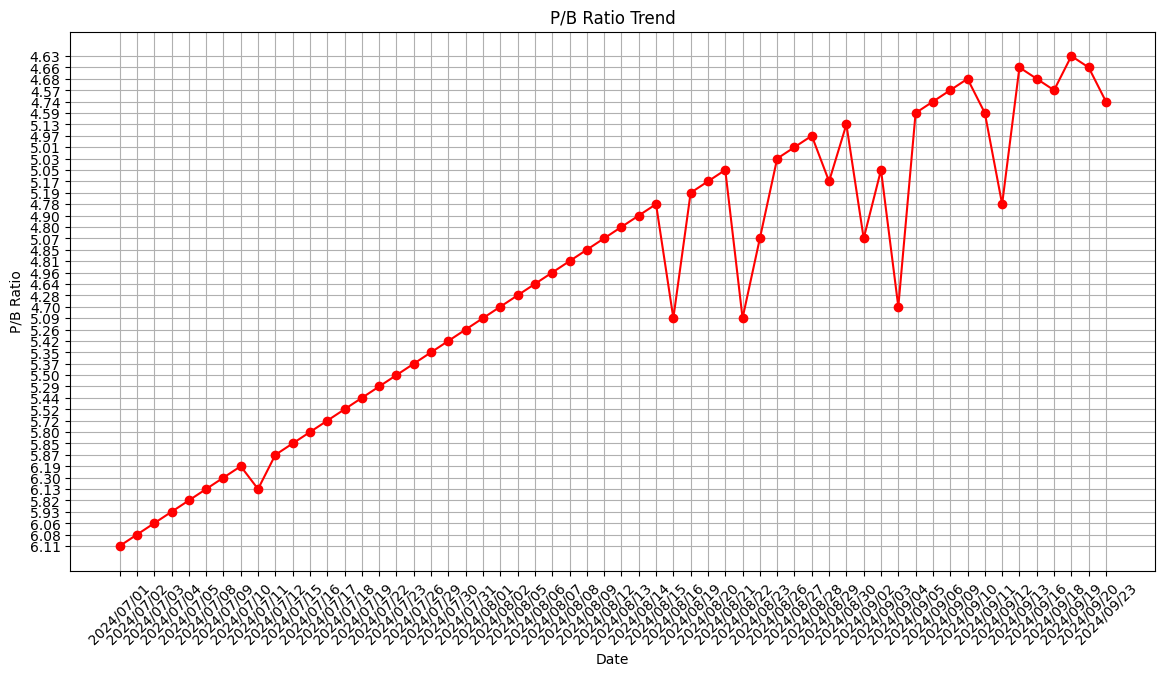

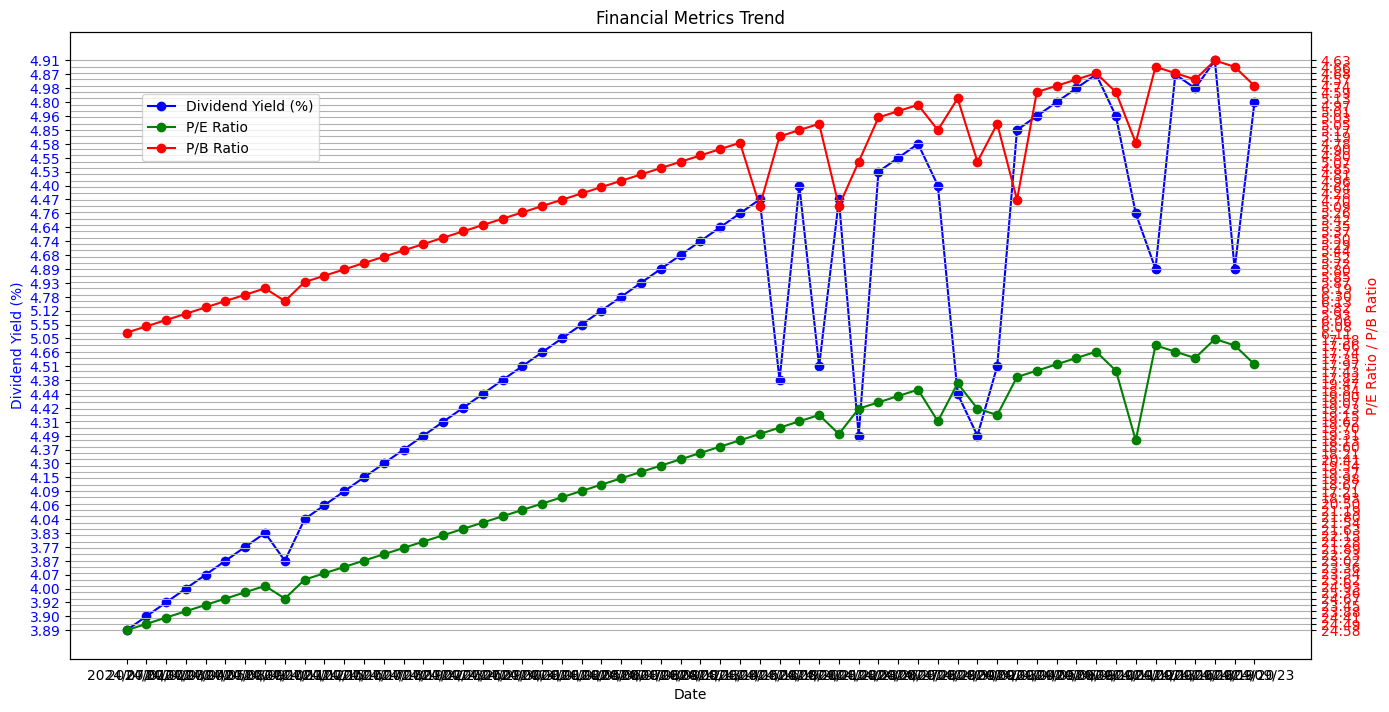

In [ ]:
# 顯示基本資訊
show_basic_info(all_df)

# 繪製殖利率趨勢圖
plot_dividend_yield(all_df)

# 繪製本益比趨勢圖
plot_pe_ratio(all_df)

# 繪製股價淨值比趨勢圖
plot_pbr(all_df)

# 同時繪製所有財務指標趨勢圖
plot_financial_metrics(all_df)

## Yahoo

In [ ]:
# 用來處理時間
from datetime import datetime
# 解析網頁內容
from bs4 import BeautifulSoup

In [ ]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# 股票代號
stock_id = '3711'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2024/09/24 14:30,3711,157.0,155.0,157.0,152.0,155.3,30.71,157.0,0.00%,0.00,"19,770","17,476",3.18%


In [ ]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '3711', 'income-statement']
income-statement


In [ ]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

      年度/季別       營業現金流        投資現金流        融資現金流       自由現金流         淨現金流
0   2024 Q2  16,786,149  -14,482,107  -13,423,586   2,304,042   -8,932,488
1   2024 Q1  16,693,966  -15,507,828     -172,552   1,186,138    7,820,612
2   2023 Q4  46,827,455  -11,277,015  -23,906,940  35,550,440    4,210,649
3   2023 Q3  20,880,333  -14,622,070   -9,238,778   6,258,263    3,462,354
4   2023 Q2  15,955,817  -14,431,220   -4,450,562   1,524,597   -2,444,615
5   2023 Q1  30,758,244  -14,791,689  -11,504,759  15,966,555    4,015,736
6   2022 Q4  50,176,013  -21,548,743  -17,898,853  28,627,270    5,682,370
7   2022 Q3  18,617,765  -16,931,415  -29,107,379   1,686,350  -20,487,662
8   2022 Q2  15,026,804  -17,536,489   -9,873,328  -2,509,685  -11,580,148
9   2022 Q1  27,180,390  -17,935,227   -5,579,246   9,245,163    8,352,489
10  2021 Q4  32,918,196    5,298,762  -15,803,667  38,216,958   22,654,391
11  2021 Q3  14,832,779  -20,432,874    6,382,136  -5,600,095      432,173
12  2021 Q2  18,231,411  

### 繪製現金流量趨勢圖

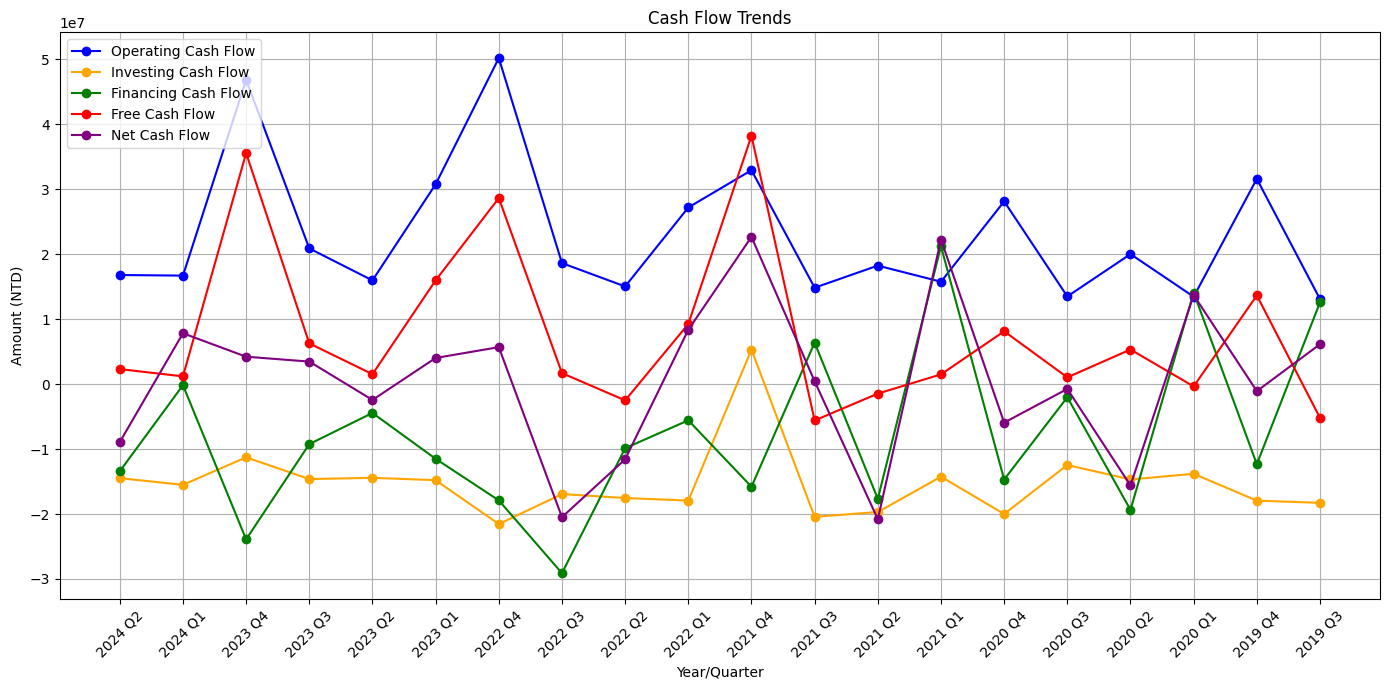

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_cash_flows(df, title='Cash Flow Trends'):
    '''
    繪製營業現金流、投資現金流、融資現金流、自由現金流和淨現金流的趨勢圖。

    參數：
    - df (DataFrame): 包含各現金流的資料
    - title (str): 圖表標題
    '''
    # 去掉逗號並將數據轉換為數字格式
    for col in ['營業現金流', '投資現金流', '融資現金流', '自由現金流', '淨現金流']:
        df[col] = df[col].str.replace(',', '').astype(float)

    plt.figure(figsize=(14, 7))

    # 繪製各種現金流趨勢
    plt.plot(df['年度/季別'], df['營業現金流'], marker='o', label='Operating Cash Flow', color='blue')
    plt.plot(df['年度/季別'], df['投資現金流'], marker='o', label='Investing Cash Flow', color='orange')
    plt.plot(df['年度/季別'], df['融資現金流'], marker='o', label='Financing Cash Flow', color='green')
    plt.plot(df['年度/季別'], df['自由現金流'], marker='o', label='Free Cash Flow', color='red')
    plt.plot(df['年度/季別'], df['淨現金流'], marker='o', label='Net Cash Flow', color='purple')

    plt.title(title)
    plt.xlabel('Year/Quarter')
    plt.ylabel('Amount (NTD)')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_cash_flows(df)
